In [1]:
import tensorflow as tf
import glob
import numpy as np
import matplotlib.pyplot as plt

from model import Rewrite

%matplotlib inline

print(tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Keras version", tf.keras.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

2.9.1
Eager mode:  True
Keras version 2.9.0
GPU is available


In [2]:
test_images = []
test_labels = []
for path in glob.glob('datasets/images/*.png'):
    image = tf.keras.utils.load_img(path)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.keras.preprocessing.image.smart_resize(image, (80, 160))
    source = image[:, :80, :]
    source = source/255.
    test_images.append(source)
    target = image[:, 80:, :]
    target = target/255.
    test_labels.append(target)
test_images = np.array(test_images, dtype=np.float32)

In [3]:
model = Rewrite()
model.load_weights('rewrite.h5')

In [4]:
predicted_images = model.predict(test_images[:25])

1/1 [==============================] - 9s 9s/step


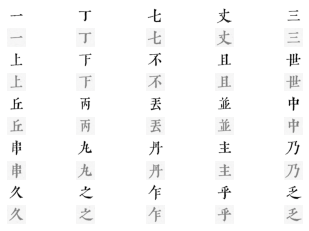

In [5]:
rows = 10
columns = 5
fig, ax = plt.subplots(rows, columns)
for row in range(rows):
    for column in range(columns):
        if row%2 == 0: # Groud Truth
            original_image = test_labels[row//2*columns+column]
            image = original_image*255.0
        else: 
            predicted_image = predicted_images[row//2*columns+column]
            image = predicted_image*255.0
        ax[row,column].imshow(image.astype(np.uint8))
        ax[row,column].axis('off')
plt.show()